In [33]:
import numpy as np
import pandas as pd

file_path = r"C:\Users\12489\Documents\Data\zoo.csv"
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [34]:
labels = data['class_type']

print(np.unique(labels.values))

[1 2 3 4 5 6 7]


<AxesSubplot:>

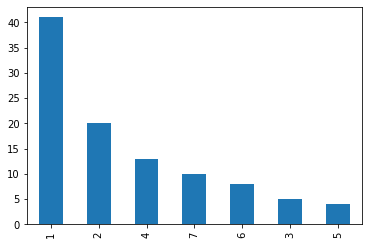

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
(labels.value_counts()).plot(ax=axes, kind='bar')

In [36]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [37]:
features = data.values[:,1:-1]
features.shape

(101, 16)

--------------------------------

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7, linkage='average', affinity='cosine')

model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [39]:
# predict labels

model.labels_

print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [40]:
# since the model predicts with zero index,
# lets make sure the labels match

labels = labels-1

------------------------------

In [41]:
# finally, lets check the accuracy

from sklearn.metrics import mean_squared_error

score = mean_squared_error(labels, model.labels_)

In [42]:
abs_error = np.sqrt(score)

abs_error

2.4373333911071624

-----------------------------------

### Quick recap...

1. Import libraries & dataset

2. Wrangle the data (ex. check for missing values)

3. Identify labels & explore/plot them

4. Extract the features (X) that will be used for clustering

5. Fit agglomerative clustering model on the features

6. Predict labels

7. Check for accuracy (ex. find Root Mean Squared Error)